# Hodgkin-Huxley Model

## 1. General Equation for the Membrane Potential

#### The Hodgkin-Huxley model describes the change in membrane potential \( V \) over time due to ionic currents (sodium, potassium, and leakage) and an external current. The general equation is:



$$ 
C_m \frac{dV}{dt} = I_{\text{ext}} - \left( I_{\text{Na}} + I_{\text{K}} + I_{\text{L}} \right)
 $$

#### where:
$$ ( C_m )$$ 
#### is the membrane capacitance.
$$ ( \frac{dV}{dt} ) is the $$ 
#### rate of change of the membrane potential over time.
$$  ( I_{\text{ext}} )$$
#### is an external applied current.
$$ ( I_{\text{Na}} ), ( I_{\text{K}} ),  ( I_{\text{L}} )$$ 
#### are the sodium, potassium, and leakage currents, respectively.

## 2. Specific Ionic Currents

#### Each ionic current depends on the ion's conductance and the difference between the membrane potential V  and the specific equilibrium potential for each ion.


#### Sodium Current 

$$ (( I_{{Na}} )) 
I_{{Na}} = g_{{Na}} m^3 h *(V - E_{{Na}}) $$ 

#### where:
$$ ( g_{{Na}} ) $$ 

#### is the maximum sodium conductance.

$$ ( m ) and ( h )$$ 
#### represent the probability of sodium channel opening.

$$ ( E_{{Na}} )$$ 

#### is the sodium equilibrium potential.

##### Potassium Current

$$ (( I_{{K}} ))
  [
  I_{{K}} = g_{{K}} n^4 (V - E_{{K}})
  ]$$

####  where:

$$ ( g_{{K}} ) $$

#### is the maximum potassium conductance n represents the probability of potassium channel opening.


$$ ( E_{{K}} )$$ 

#### is the potassium equilibrium potential.

### Leakage Current 

$$(( I_{{L}}))
  [
  I_{L}= g_{L}(V - E_{L})
  ] $$

#### where:

$$ ( g_{{L}} )$$ 

#### is the leakage conductance


$$ ( E_{{L}} )$$ 

#### is the leakage equilibrium potential.

## 3. Activation and Inactivation Variables ( m ), ( h ), ( n ))

#### The variables \( m \), \( h \), and \( n \) represent the probabilities of channel opening and depend on the membrane voltage.

$$
\frac{dm}{dt}=\alpha_m(1 - m)-\beta_m m
\frac{dh}{dt}=\alpha_h (1 - h)-\beta_h h
\frac{dn}{dt}=\alpha_n (1 - n)-\beta_n n
$$ 

#### where $$ ( \alpha )$$  and $$( \beta )$$  are constants dependent on the voltage v, controlling the transitions between open and closed states of the channels.

## Python Code for Implementing the Equations:
#### The Python code below sets up the differential equations and ionic currents as described in the model. You can run it in your Jupyter Notebook to simulate the membrane potential behavior over time.

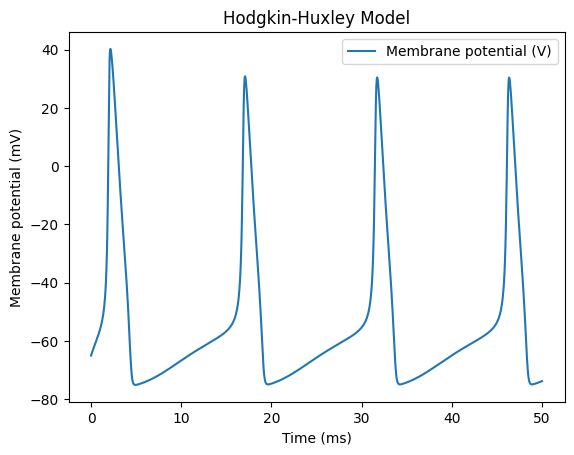

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Model parameters
C_m = 1.0   # Membrane capacitance (uF/cm^2)
g_Na = 120.0  # Maximum sodium conductance (mS/cm^2)
g_K = 36.0    # Maximum potassium conductance (mS/cm^2)
g_L = 0.3     # Leakage conductance (mS/cm^2)
E_Na = 50.0   # Sodium equilibrium potential (mV)
E_K = -77.0   # Potassium equilibrium potential (mV)
E_L = -54.387 # Leakage equilibrium potential (mV)
I_ext = 10.0  # External applied current (uA/cm^2)

# Alpha and beta functions for m, h, and n
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Hodgkin-Huxley differential equations
def hodgkin_huxley(y, t):
    V, m, h, n = y

    # Ionic currents
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K * n**4 * (V - E_K)
    I_L = g_L * (V - E_L)

    # Differential equation for V
    dVdt = (I_ext - (I_Na + I_K + I_L)) / C_m
    
    # Differential equations for m, h, and n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n

    return [dVdt, dmdt, dhdt, dndt]

# Initial conditions
V0 = -65.0   # Resting membrane potential
m0 = alpha_m(V0) / (alpha_m(V0) + beta_m(V0))
h0 = alpha_h(V0) / (alpha_h(V0) + beta_h(V0))
n0 = alpha_n(V0) / (alpha_n(V0) + beta_n(V0))

# Simulation time
t = np.linspace(0, 50, 1000)

# Solve the system of differential equations
sol = odeint(hodgkin_huxley, [V0, m0, h0, n0], t)

# Plot membrane potential over time
plt.plot(t, sol[:, 0], label="Membrane potential (V)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Hodgkin-Huxley Model")
plt.legend()
plt.show()


### The Hodgkin-Huxley model provides a detailed understanding of how neurons respond to electrical stimuli through the dynamics of ions across their membranes. The variables in the model allow for the simulation and prediction of neuronal behavior under different conditions, which is fundamental for studying neural communication and the basis of various brain functions.

## Bibliograpy:

### Dynamical Systems in Neuroscience: The Geometry of Excitability and Bursting"- Eugene M. Izhikevich
### Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering" - Steven H. Strogatz
### Python for Neuroscience - Eilif Muller y Andrew Davison
### "Think Python: How to Think Like a Computer Scientist" - Allen B. Downey